In [1]:
#1(a)
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime

In [88]:
# Pull in the datset
sectors2 = pd.read_excel("forwardSector.xlsx", index_col = 0, parse_dates = True)
sectors2

,S5MATR Index (R1),S5ENRS Index (R2),S4RLST Index (L1),S5FINL Index (R1),S5INDU Index (R1),S5TELS Index (R1),S5UTIL Index (R1),S5COND Index (L1),S5CONS Index (R1),S5HLTH Index (R1),S5INFT Index (L1),SPX Index (R1)
Date,,,,,,,,,,,,
2023-01-31,17.9081,10.7430,32.2286,13.3426,19.1048,15.5487,18.0203,22.8799,20.3698,17.3003,22.6707,18.1990
2023-01-27,17.5719,10.9352,31.7015,13.2034,18.9574,15.6275,18.0010,22.8657,20.1476,17.1977,22.7657,18.1617
2023-01-20,17.1242,10.6727,30.3745,12.8771,18.3096,14.9715,18.0841,21.3794,20.1048,17.2956,21.5423,17.5797
2023-01-13,17.3470,10.5296,29.7772,13.0073,18.8523,14.5053,18.6572,21.3390,20.7692,17.3790,21.4114,17.6258
2023-01-06,16.5958,10.1140,28.1291,12.7110,18.7490,13.9931,18.5873,19.9729,21.1234,17.3654,20.4468,17.1330
...,...,...,...,...,...,...,...,...,...,...,...,...
1991-02-22,NaN,12.8942,NaN,NaN,NaN,NaN,10.8394,NaN,NaN,17.4912,NaN,NaN
1991-02-15,NaN,12.9320,NaN,NaN,NaN,NaN,10.9106,NaN,NaN,17.5917,NaN,NaN
1991-02-08,NaN,12.9943,NaN,NaN,NaN,NaN,10.7161,NaN,NaN,16.8258,NaN,NaN


In [89]:
sectors=pd.DataFrame(sectors2['S5INDU Index  (R1)'])
sectors.columns = ["Sector PE"]
sectors

,Sector PE
Date,
2023-01-31,19.1048
2023-01-27,18.9574
2023-01-20,18.3096
2023-01-13,18.8523
2023-01-06,18.7490
...,...
1991-02-22,NaN
1991-02-15,NaN
1991-02-08,NaN


In [90]:
sector = "XLI"
sector = yf.download(sector)[["Adj Close"]].copy()
sector

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1998-12-22 00:00:00-05:00,15.154413
1998-12-23 00:00:00-05:00,15.418845
1998-12-24 00:00:00-05:00,15.622268
1998-12-28 00:00:00-05:00,15.703638
1998-12-29 00:00:00-05:00,15.927391
...,...
2023-02-13 00:00:00-05:00,103.070000
2023-02-14 00:00:00-05:00,102.790001
2023-02-15 00:00:00-05:00,103.430000


In [92]:
#sector.index = pd.to_datetime(sector.index).tz_localize('Etc/UCT')
sectors.index = pd.to_datetime(sectors.index).tz_localize('Etc/UCT')
sectors = sectors.sort_index()
# merge fundamentals
data = sectors.merge(sector, left_index = True, right_index = True)[::-1]
data = pd.merge_asof(sector, sectors,left_index = True, right_index = True)[::-1]

# sample down to the weekly level
data = data.resample('W').last()
data["returns"] = np.log(data["Adj Close"]).diff()
data.dropna(inplace = True)
data = data[data.index > "4/22/2005"]
data

,Adj Close,Sector PE,returns
Date,,,
2005-04-24 00:00:00-04:00,20.605513,18.9874,0.011676
2005-05-01 00:00:00-04:00,20.626614,17.0237,0.001024
2005-05-08 00:00:00-04:00,20.809523,17.0039,0.008829
2005-05-15 00:00:00-04:00,20.521091,16.6437,-0.013957
2005-05-22 00:00:00-04:00,21.287909,17.1709,0.036686
...,...,...,...
2023-01-22 00:00:00-05:00,98.989998,18.3096,-0.034454
2023-01-29 00:00:00-05:00,101.139999,18.9574,0.021487
2023-02-05 00:00:00-05:00,102.849998,19.1048,0.016766


Text(0.5, 1.0, 'P/E Ratio')

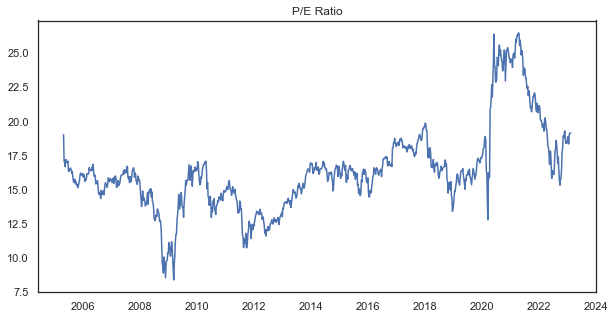

In [93]:
plt.figure(figsize = (10, 5))
plt.plot(data["Sector PE"])
plt.title("P/E Ratio")

Text(0.5, 1.0, 'Price Series')

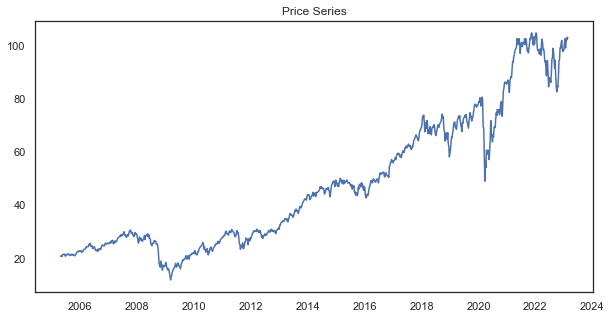

In [94]:
plt.figure(figsize = (10, 5))
plt.plot(data["Adj Close"])
plt.title("Price Series")

In [95]:
#1.(b)
# specify candidate values for hyperparameters
ks = np.linspace(.01, .99, 10)
zs = np.linspace(.01, 3, 10)
ws = np.arange(5, 30, 5)
hs = 1

import itertools as it
# build a grid with all possible hyperparameters
grid = np.array(np.meshgrid(ks,zs, ws, hs)).T.reshape(-1,4)

grid

array([[1.00000000e-02, 1.00000000e-02, 5.00000000e+00, 1.00000000e+00],
       [1.00000000e-02, 3.42222222e-01, 5.00000000e+00, 1.00000000e+00],
       [1.00000000e-02, 6.74444444e-01, 5.00000000e+00, 1.00000000e+00],
       ...,
       [9.90000000e-01, 2.33555556e+00, 2.50000000e+01, 1.00000000e+00],
       [9.90000000e-01, 2.66777778e+00, 2.50000000e+01, 1.00000000e+00],
       [9.90000000e-01, 3.00000000e+00, 2.50000000e+01, 1.00000000e+00]])

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
storage = pd.DataFrame(columns = ["k", "z", "w", "h", "profits"])
df_copy = data.iloc[:round(len(data)*0.8)]

for n in range(len(grid)):
    # Each loop we pull out the values for a new set of hyperparamters from the grid
    k,z,w,h= grid[n]
    
    # We fit a filter and CI using the next set of parameters
    df_copy["Filter"] = df_copy["Sector PE"].ewm(alpha = k, adjust = False).mean()
    df_copy["Filter Error"] = df_copy["Sector PE"] -df_copy["Filter"]
    df_copy["std"] = df_copy["Filter Error"].rolling(int(w)).std()
    df_copy["Upper"] = df_copy["Filter"] + z*df_copy["std"]
    df_copy["Lower"] = df_copy["Filter"] - z*df_copy["std"]
    df_copy["test"] = np.where(df_copy["Filter Error"].abs()>z*df_copy["std"], 1, 0)*np.sign(df_copy["Filter Error"])
    
    # create vectors where we can store information on signals and when the change is first signalled
    df_copy["test2"] = 0
    df_copy["signal"] = 0
    
    for j in df_copy.index:
        # if there is a change in the signal, we want to take a position for teh next h periods
        if (df_copy.loc[j, "test"] == 1) &  (df_copy.shift().loc[j, "test"] != 1):
            df_copy.loc[j:j+datetime.timedelta(h), "signal"] = 1
            df_copy.loc[j, "test2"] = 1
        elif (df_copy.loc[j, "test"] == -1) &  (df_copy.shift().loc[j, "test"] != -1):
            df_copy.loc[j:j+datetime.timedelta(h), "signal"] =  -1
            df_copy.loc[j, "test2"] = -1
    
    # calculate metric
    df_copy["cumulative_returns"] = np.exp((df_copy["signal"].shift()*df_copy.returns).cumsum())-1
    
    # store the results
    storage = storage.append({"k":k, "z":z, "w":w, "h":h,
                "profits":df_copy["cumulative_returns"][-1]}, ignore_index = True)
    # print so I can track progress of loop (can take a few minutes)
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [98]:
storage = storage.sort_values(by = "profits").reset_index(drop = True)
storage

,k,z,w,h,profits
0,0.772222,1.006667,10.0,1.0,-0.637583
1,0.554444,0.342222,15.0,1.0,-0.627534
2,0.554444,0.342222,20.0,1.0,-0.553315
3,0.772222,1.006667,5.0,1.0,-0.549113
4,0.445556,1.006667,5.0,1.0,-0.528678
...,...,...,...,...,...
495,0.227778,1.006667,5.0,1.0,0.33821
496,0.881111,2.003333,10.0,1.0,0.353711
497,0.118889,2.335556,5.0,1.0,0.361664
498,0.99,2.003333,10.0,1.0,0.366713


Text(0.5, 1.0, 'k optimization')

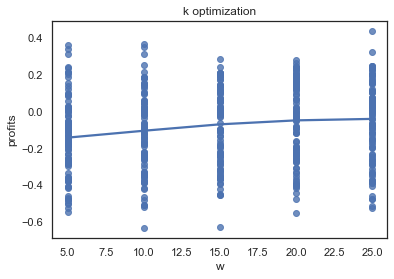

In [99]:
import seaborn as sns
sns.regplot(data = storage, x = "w", y = "profits", lowess = True)
plt.title("k optimization")

In [100]:
def heatmap(x, y, metric, values):
    
    # specify the columns I will be pulling from the results
    p2p = values[[x, y, metric]]
    
    # If p > 2, we need to group 
    heat = np.round(p2p.groupby([x,y]).max(),1)
    heat = heat.unstack()[metric]

    # round labels
    heat.index = np.round(heat.index,2)
    heat.columns = np.round(heat.columns,2)

    # make plot
    f, ax = plt.subplots(figsize=(25, 12))
    ax = sns.heatmap(heat, fmt='.1g')
    ax.set_title("Heat map of "+ metric,size = 18)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(y, size = 18)
    ax.set_ylabel(x, size = 18)
    ax.collections[0].colorbar.set_label(metric, size = 18)
    sns.set(font_scale=1)
    plt.show()

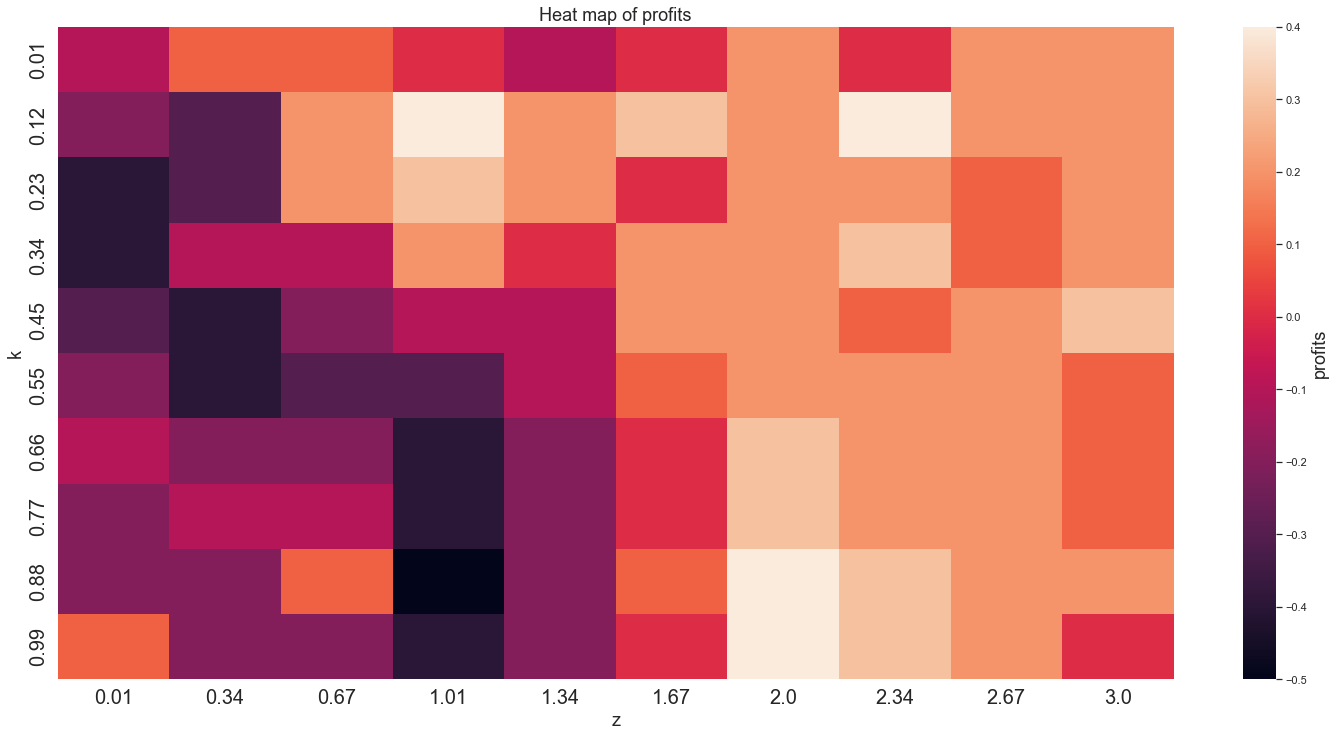

In [101]:
heatmap("k", "z","profits", storage)

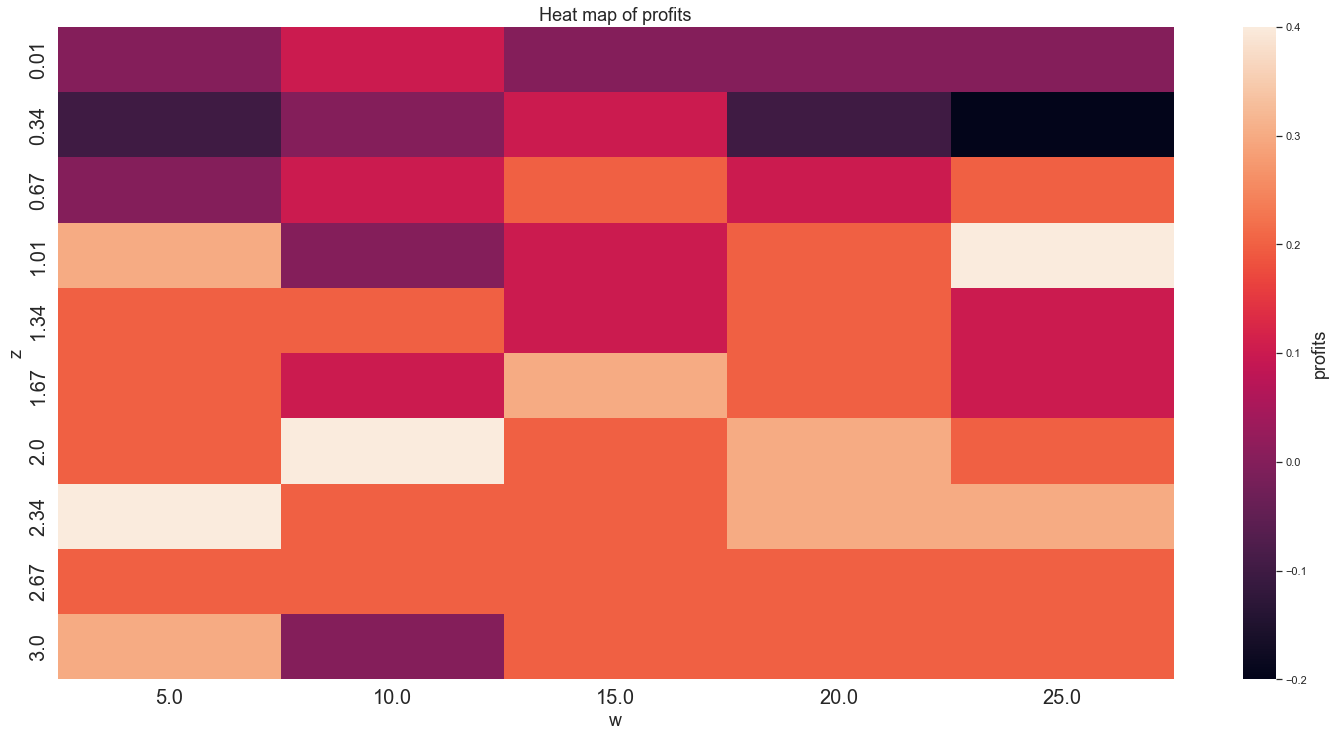

In [102]:
heatmap("z", "w","profits", storage)

In [103]:
k,z,w, h, p = storage.iloc[-1]

In [104]:
print('We finally choose k =',k,', z =',z,' ,w =',w,'.')

We finally choose k = 0.11888888888888888 , z = 1.0066666666666668  ,w = 25.0 .


We choose these hyperparameters because this combination makes the highest profits. As is shown in heatmaps, this combination has the lightest color.

In [105]:
#1.(c)
df_copy2 = data.iloc[round(len(data)*0.8):]

df_copy2["Filter"] = df_copy2["Sector PE"].ewm(alpha = k, adjust = False).mean()
df_copy2["Filter Error"] = df_copy2["Sector PE"] -df_copy2["Filter"]
df_copy2["std"] = df_copy2["Filter Error"].rolling(int(w)).std()
df_copy2["Upper"] = df_copy2["Filter"] + z*df_copy2["std"]
df_copy2["Lower"] = df_copy2["Filter"] - z*df_copy2["std"]

df_copy2["test"] = np.where(df_copy2["Filter Error"].abs()>z*df_copy2["std"], 1, 0)*np.sign(df_copy2["Filter Error"])

df_copy2["test2"] = 0
df_copy2["signal"] = 0
for j in df_copy2.index:
    if (df_copy2.loc[j, "test"] == 1) &  (df_copy2.shift().loc[j, "test"] != 1):
        df_copy2.loc[j:j+datetime.timedelta(h), "signal"] = 1
        df_copy2.loc[j, "test2"] = 1
    elif (df_copy2.loc[j, "test"] == -1) &  (df_copy2.shift().loc[j, "test"] != -1):
        df_copy2.loc[j:j+datetime.timedelta(h), "signal"] =  -1
        df_copy2.loc[j, "test2"] = -1
df_copy2["cumulative_returns"] = np.exp((df_copy2["signal"].shift()*df_copy2.returns).cumsum())-1
df_copy2["strat_returns"] = df_copy2["signal"].shift()*df_copy2.returns

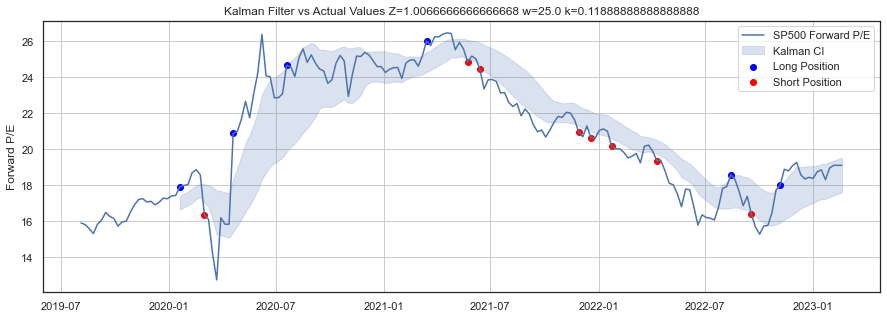

In [106]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Forward P/E")
ax.plot(df_copy2["Sector PE"])
#ax.plot(df_copy2["Filter"])


ax.fill_between(df_copy2.index, df_copy2.Lower, df_copy2.Upper, color='b', alpha=.2)
ax.scatter(df_copy2[df_copy2.test2 == 1].index, df_copy2[df_copy2.test2 == 1]["Sector PE"], color = "blue")
ax.scatter(df_copy2[df_copy2.test2 == -1].index, df_copy2[df_copy2.test2 == -1]["Sector PE"], color = "red")

#ax.axvline(df_copy.index[-5], color = "red", linestyle = '--')
ax.legend(["SP500 Forward P/E", "Kalman CI", "Long Position", "Short Position"])


#plt.xlim([datetime.date(2000, 1, 1), datetime.date(2004, 1, 1)])
ax.grid()

In [130]:
df_copy2["success"] = ((df_copy2[df_copy2.test2 != 0]["cumulative_returns"].diff()>0)*1).shift(-1)

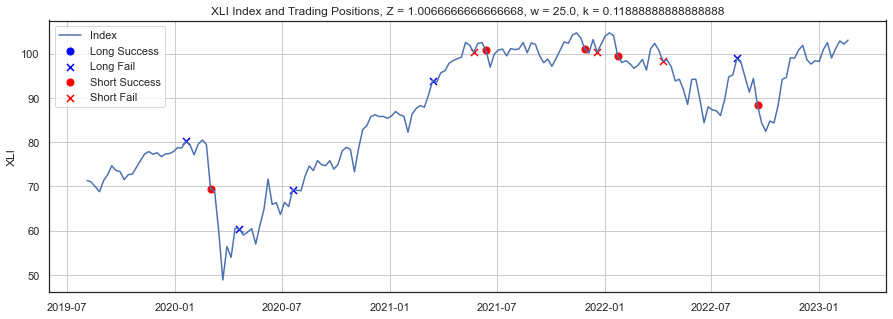

In [108]:
plt.figure(figsize = (15, 5))

plt.title("XLI Index and Trading Positions"+ ", Z = "+str(z) + ", w = " + str(w)+ ", k = " + str(k))
plt.ylabel("XLI")
plt.plot(df_copy2["Adj Close"])

longsuccess = df_copy2[(df_copy2["success"] == 1) & (df_copy2["test2"] == 1)]
longfail = df_copy2[(df_copy2["success"] == 0) & (df_copy2["test2"] == 1)] 
shortsuccess = df_copy2[(df_copy2["success"] == 1) & (df_copy2["test2"] == -1)]
shortfail = df_copy2[(df_copy2["success"] == 0) & (df_copy2["test2"] == -1)]

plt.scatter(longsuccess.index, longsuccess["Adj Close"], color = 'blue', s = 50)
plt.scatter(longfail.index, longfail["Adj Close"], color = 'blue', s = 50, marker = "x")

plt.scatter(shortsuccess.index, shortsuccess["Adj Close"], color = 'red', s = 50)
plt.scatter(shortfail.index, shortfail["Adj Close"], color = 'red', s = 50, marker = "x")

plt.legend(["Index", "Long Success", "Long Fail", "Short Success", "Short Fail"])
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
plt.grid()

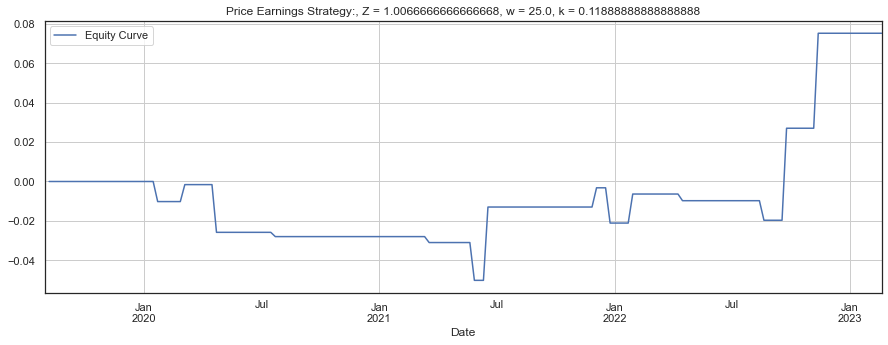

In [109]:
plt.figure(figsize = (15, 5))
(df_copy2["cumulative_returns"]).plot()

plt.title("Price Earnings Strategy:"+ ", Z = "+str(z) + ", w = " + str(w)+ ", k = " + str(k))



plt.legend(["Equity Curve"])

plt.grid()
#plt.xlim(["1/1/2019", "1/1/2022"])

The total rate of return is approximately 8%.

In [126]:
P = 1000
A = (1+df_copy2['cumulative_returns'][-1])*P
T = len(df_copy2)/52


((A/P)**(1/T)-1)*100

2.0476528876155697

Annualized Return is 2.05%

In [127]:
P = 1000
A = (1+df_copy2['cumulative_returns'][-1])*P
T = len(df_copy2[df_copy2["signal"] != 0])/52


((A/P)**(1/T)-1)*100

30.90445077083295

Rate of return only over the days we hold a position is 30.9%.

In [113]:
rf_rate = pd.read_csv("1-year-treasury-rate-yield-chart.csv", index_col = 0, parse_dates = True).dropna()

In [140]:
# match index and dates with our data
drange = pd.date_range(start = "08/2019", end = "25/02/2023", freq = "W")
df_copy2.index = drange-datetime.timedelta(2)

df_copy2["rf"] = rf_rate

# Take the first value for each year out of the data
rfs = df_copy2["rf"].resample("Y").first()[1:-1]

# Calculate the annualized return
t = len(rfs)
rfp = ((((rfs/100)+1).cumprod()[-1])**(1/t)-1)
rfp


0.006914255109853551

In [147]:
# add the weekly risk free rate to our data
df_copy2["rf"] = df_copy2["rf"].ffill()

In [149]:
# strategy returns
return_frame=pd.DataFrame()
return_frame['returns'] = df_copy2[["strat_returns"]].copy().dropna()

# the weekly rate of raturn for the risk free rate
return_frame["rf"] = (df_copy2[["rf"]].dropna()/100+1)**(1/52)-1

excess_return = return_frame["returns"]- return_frame["rf"]


In [150]:
anualized_excess = ((excess_return+1).prod()**(52/len(df_copy2))-1)*100

In [151]:
excess_ann_std = excess_return.std()*np.sqrt(52)*100

In [152]:
print((anualized_excess)/excess_ann_std)

0.14231420597252029


The sharpe ratio is 0.14.

In [12]:
#2(a)
import scipy.optimize as so
import numpy as np

def YTM(PV,C,k,M,T):
    def ff(y):
        coupon=[]
        for i in np.arange(0,T*k):
            coupon.append((C/k)/pow(1+y,i+1))
        return np.sum(coupon)+M/pow(1+y,T*k)-PV
    return so.fsolve(ff,0.1)
Bond_yield=YTM(PV=983.125,C=35,k=2,M=1000,T=10)
print('semiannualized YTM:',Bond_yield) 

semiannualized YTM: [0.01851731]


The semiannual YTM is 1.85%.

In [13]:
#2(b)
print('annualized YTM:',(Bond_yield+1)**2-1) 

annualized YTM: [0.03737752]


The annualized YTM is 3.74%.

In [360]:
#3(a)
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime

In [361]:
df = pd.read_excel('ex_rates.xlsx', index_col = 0, parse_dates = True)

In [362]:
df=df.dropna()
df=df.drop(columns=['Canada','Australia','Switzerland','United Kingdom','Japan','Norway','New Zealand','Sweden'])
df['United States'] = 1
df

,Euro Area,United States
2000-02-01,1.029442,1
2000-03-01,1.046792,1
2000-04-01,1.100715,1
2000-05-01,1.074922,1
2000-06-01,1.046463,1
...,...,...
2022-09-01,1.025851,1
2022-10-01,1.008675,1
2022-11-01,0.963763,1
2022-12-01,0.937559,1


In [363]:
irs = pd.read_csv('Hw3_Interest_Rates.csv', index_col = 0, parse_dates = True)

In [364]:
irs=irs+1
irs=irs.drop(columns=['Canada','Australia','Switzerland','United Kingdom','Japan','Norway','New Zealand','Sweden'])
irs

,United States,Euro Area
date,,
2000-02-01,1.004875,1.002901
2000-03-01,1.004978,1.003070
2000-04-01,1.005088,1.003214
2000-05-01,1.005427,1.003564
2000-06-01,1.005442,1.003676
...,...,...
2022-09-01,1.002636,1.000839
2022-10-01,1.003153,1.001182
2022-11-01,1.003643,1.001508


In [365]:
# calculate the currencies with the highest and lowest yields each period
maxI = irs.idxmax(axis = 1)
minI = irs.idxmin(axis = 1)

In [366]:
ex= pd.DataFrame([maxI, minI]).T
ex.columns = ["High Yield", "Low Yield"]

In [367]:
profits = np.array([])
for j in range(len(df)-1):
    
    # identify the country with the highest (long)
    # and lowest (short) yield
    long = maxI[j]
    short = minI[j]
    
    # get the exchange rate at t0 and t+1
    # for the short
    sts0 = df[short][j]
    sts1 = df[short][j+1]
    
    # get the monthly interest rate
    # for the short
    si = irs[short][j]
    
    # calculate the amount owed
    owed = 10000*sts0*si/sts1
    
    # get the exchange rate at t0 and t+1
    # for the long
    stl0 = df[long][j]
    stl1 = df[long][j+1]
    
    # get the monthly interest rate for the long
    li = irs[long][j]
    
    # calculate the ending balance
    balance = 10000*stl0*li/stl1
    
    # calculate the profit
    profit = balance - owed
    
    # store the profits
    profits = np.append(profits, profit)
    
    print(profit)
    
    
profits = pd.DataFrame(profits, index = df.index[:-1], columns = ["Profit"])

185.96933173112302
510.48208726957637
-221.97898835549495
-254.30022294653827
346.4096189493066
382.50605859471034
173.4556305266833
412.44034263972026
-305.635095396472
-705.7521011583431
24.91516805637366
55.36841924964392
455.58963102588314
-48.5621396691422
-446.6359101979051
4.943391456299651
331.2039172196928
468.4725335542025
-22.559997595575624
-88.79570226100623
-149.2607137898376
-84.76820733124259
-187.92110392022187
29.274548349791075
97.12860772026397
338.49241695170895
434.41895649416256
641.5815824816564
-179.56958000933628
64.43839001613742
40.742847874189465
16.692471267449946
76.51557709591907
579.724554800101
327.5658392622354
-18.89762826065089
116.63856789234887
227.7146753548932
632.6788952013103
-325.10682861230816
-86.42510625996147
-337.2038287576561
673.3743830476415
-17.027597277825407
329.218256433076
539.8226332240574
-186.52784762616284
35.95936316364532
-148.10666709582438
-218.93970275866923
218.40928278199317
-28.03929842202706
-90.24877610923795
64.384

In [368]:
profits[profits.index.year == 2008]

,Profit
2008-01-01,205.611788
2008-02-01,437.275684
2008-03-01,-158.105214
2008-04-01,-5.103308
2008-05-01,183.433109
2008-06-01,-79.894513
2008-07-01,-545.938991
2008-08-01,-276.859827
2008-09-01,-1073.853534
2008-10-01,-17.278633


In [369]:
profits.idxmax()

Profit   2008-11-01
dtype: datetime64[ns]

In [370]:
Cumulative_Yearly = profits.Profit.resample('Y').sum().cumsum()
rorY = profits.Profit.resample('Y').sum()/10000*100

In [371]:
profits.Profit.resample('Y').sum()

2000-12-31     548.511830
2001-12-31     287.074118
2002-12-31    2467.006212
2003-12-31    1548.258574
2004-12-31     978.450039
2005-12-31     834.802587
2006-12-31    -493.669135
2007-12-31   -1306.246982
2008-12-31   -1158.115752
2009-12-31     978.899927
2010-12-31     -35.346607
2011-12-31    -209.242970
2012-12-31    -500.564742
2013-12-31     202.217493
2014-12-31     356.509889
2015-12-31     330.131243
2016-12-31     221.643316
2017-12-31   -1344.840305
2018-12-31    1045.766113
2019-12-31     625.764024
2020-12-31    -635.526767
2021-12-31     887.305834
2022-12-31     434.470633
Freq: A-DEC, Name: Profit, dtype: float64

In [372]:
cp = profits.resample('Y').sum().cumsum().append(pd.DataFrame(0, 
                                                              index = [pd.to_datetime("12/31/1999")], 
                                                              columns = ['Profit'])).sort_index()
cp

,Profit
1999-12-31,0.000000
2000-12-31,548.511830
2001-12-31,835.585948
2002-12-31,3302.592160
2003-12-31,4850.850734
2004-12-31,5829.300773
2005-12-31,6664.103360
2006-12-31,6170.434225
2007-12-31,4864.187243
2008-12-31,3706.071491


In [373]:
totalror=cp.loc['2022-12-31','Profit']/10000*100
totalror

60.6325857192038

In [374]:
annualized=((((cp.loc['2022-12-31','Profit']+10000)/10000)**(1/(len(profits)/12)))-1)*100
annualized

2.0896775296560977

In [375]:
rf_rate = pd.read_csv("1-year-treasury-rate-yield-chart.csv", index_col = 0, parse_dates = True).dropna()
rf_rate = (rf_rate/100+1)**(1/12)-1

In [376]:
import warnings
warnings.filterwarnings('ignore')

In [377]:
cpm = profits.append(pd.DataFrame(10000, index = [pd.to_datetime("12/31/1999")], 
                                  columns = ['Profit'])).sort_index().cumsum()
cpm=cpm.pct_change()

In [378]:
w_re=cpm.iloc[1:,:]
drange = pd.date_range(start ='2000-2-01', end = '2022-12-31', freq = "M")
w_re.index = drange

w_re["rf"] = rf_rate
w_re["rf"] = w_re["rf"].ffill()

In [379]:
w_re

,Profit,rf
2000-02-29,0.018597,0.005025
2000-03-31,0.050116,0.005088
2000-04-30,-0.020753,0.005088
2000-05-31,-0.024278,0.005159
2000-06-30,0.033895,0.004931
...,...,...
2022-08-31,0.016174,0.002871
2022-09-30,-0.008937,0.003314
2022-10-31,-0.026432,0.003803
2022-11-30,-0.015710,0.003867


In [380]:
w_reY = (w_re+1).resample('Y').prod()-1

In [381]:
w_reY['excess'] = w_reY['Profit']-w_reY['rf']

In [382]:
annualized_w = (w_reY['excess']+1).prod()**(1/len(w_reY))-1

In [383]:
std_w = w_reY['excess'].std()

In [384]:
import yfinance as yf
sp500 = yf.download("^GSPC")[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [385]:
w_re.index = pd.to_datetime(w_re.index).tz_localize('America/New_York')

In [386]:
sp500=(sp500.pct_change()+1).resample('m').prod()-1

In [387]:
w_re["SP500"] = sp500
w_re['Profit_excess'] = w_re['Profit']-w_re['rf']

w_re['market_excess'] = w_re['SP500']-w_re['rf']


In [388]:
smf.ols('Profit_excess~market_excess', data =w_re).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profit_excess   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                 0.0005304
Date:                Thu, 02 Mar 2023   Prob (F-statistic):              0.982
Time:                        16:23:10   Log-Likelihood:                 684.42
No. Observations:                 275   AIC:                            -1365.
Df Residuals:                     273   BIC:                            -1358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0005      0.001      0.399      0.690      -0.002       0.003
market_excess    -0.0006      0.027     -0.023      0.982      -0.054       0.053
==============================================================================
Omnibus:                       10.731   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               22.439
Skew:                          -0.001   Prob(JB):                     1.34e-05
Kurtosis:                       4.399   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [389]:
sharpe=annualized_w/std_w
sharpe

0.043754585224710554

In [390]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values( by = "Returns"))
    # start from 0
    LorenzCurve = pd.DataFrame({ 'Returns': [0]}).append(LorenzCurve)
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["Returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["Returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea + ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods)/2)
    gini = UpArea / AllArea
    return(gini[0])

In [391]:
returns = w_re[['Profit']]
returns.columns = ['Returns']

In [392]:
gini=GINI_COEF(returns)

In [393]:
print('Total rate of return:',totalror,'%')
print('Annualized return:',annualized,'%')
print('Alpha:',0.0005)
print('Beta:',-0.0006)
print('Sharpe Ratio:',sharpe)
print('Gini Coefficient:',gini)

Total rate of return: 60.6325857192038 %
Annualized return: 2.0896775296560977 %
Alpha: 0.0005
Beta: -0.0006
Sharpe Ratio: 0.043754585224710554
Gini Coefficient: 0.7332010098227568


4.(a) The article explains that the Fed's decision on interest rates in the future will depend on the inflation and employment data in the coming months. The Fed is reluctant to give up on its current stance on rates, as it wants to communicate that it is serious about fighting inflation. However, there is a risk that investors may view the Fed's hawkish talk as mere jawboning, meaning they may not believe the Fed's statements on future rate increases. This could cause a disconnect between the Fed's actions and the expectations of investors, which could have unintended consequences on the economy.

(b) The article states that this year's rally in stock prices could be a reflection of market expectations of rate cuts by the Fed, as reflected in the drop in long-term interest rates. The article also suggests that if investors continue to believe that the Fed will cut rates deeply next year, stock prices may continue to rise. However, if the Fed deviates from this expectation and raises rates, it could negatively impact stock prices.

5.(a) According to the article, the alternative explanation for stocks going up in Jan-Feb 2023 is that stocks may be in a new regime, rather than being supersensitive to bond yields. It suggests that recession is further off than previously thought, so stronger economic data means more profits, which dampens the impact of higher bond yields. Additionally, inflation has come down as supply chains returned to normal, despite decent growth. These factors may all contributes to the stocks going up.